# Hand writting Prediction Model
It is a model which Predict number from 0 to 9 

## Packages

Following are the libaries used.

In [47]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt

## Data Loading and Preprocessing
The MNIST dataset is loaded and preprocessed to prepare it for training and evaluation. The images are normalized to have pixel values in the range [0, 1], and the labels are one-hot encoded.

In [48]:
# load dataset 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [49]:
# Preprocess the data 
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Model Creation
 
A basic neural network model with one hidden layer is built for image classification. The model architecture includes a flattening layer, a hidden dense layer with ReLU activation, and an output dense layer with softmax activation for multi-class classification.


In [50]:
# Build the Model
model = Sequential(
    [
        Flatten(input_shape=(28,28)), # Flatten the 28x28 images into a 1D vector
        Dense(128, activation="relu"),  # Hidden layer with 128 units and ReLU activation
        Dense(10,activation="softmax"),
    ], name="My_model"
)


In [51]:
model.summary()

Model: "My_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [52]:
# compile model
model.compile(optimizer='adam',
            loss='categorical_crossentropy', 
            metrics=['accuracy'])
            
# Train the model
model.fit(x_train, y_train, 
          epochs=5, 
          batch_size=32, 
          validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2728 - accuracy: 0.9219 - val_loss: 0.1328 - val_accuracy: 0.9633
Epoch 2/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1234 - accuracy: 0.9634 - val_loss: 0.1039 - val_accuracy: 0.9698
Epoch 3/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0855 - accuracy: 0.9741 - val_loss: 0.0924 - val_accuracy: 0.9740
Epoch 4/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0654 - accuracy: 0.9795 - val_loss: 0.0858 - val_accuracy: 0.9745
Epoch 5/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0507 - accuracy: 0.9844 - val_loss: 0.0860 - val_accuracy: 0.9762


## Accuracy


In [53]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.0850 - accuracy: 0.9744
Test accuracy: 97.44%


1/1 [==============================] - 0s 29ms/step


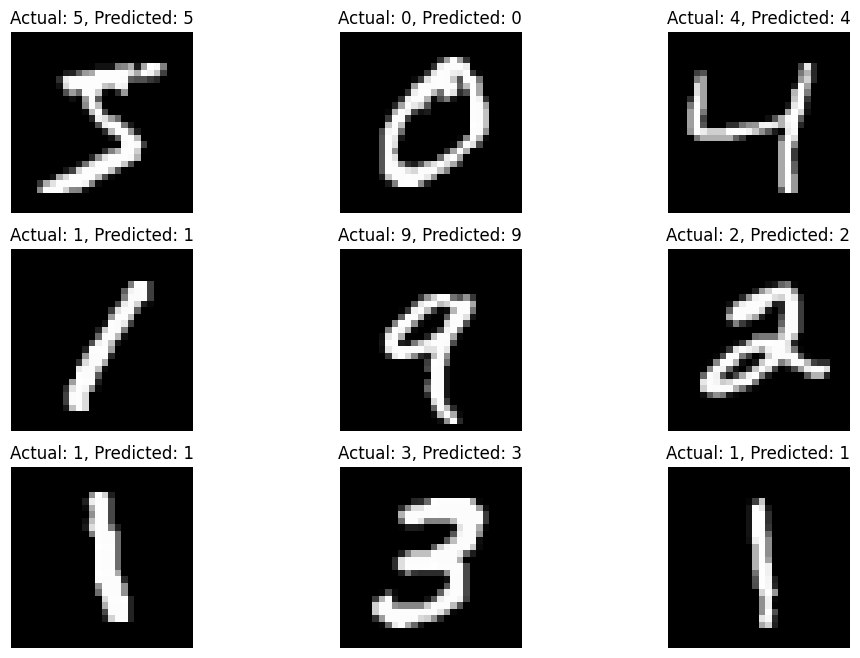

In [54]:
num_rows, num_cols = 3, 3

# Display six example images from the dataset with predictions
plt.figure(figsize=(12, 8))
for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    image = x_train[i].reshape(1, 28, 28)
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Actual: {np.argmax(y_train[i])}, Predicted: {predicted_class}")
    plt.axis('off')

plt.show()

## User Input 
You can insert an Image to check either the model predict it correct or not..

### Preprocess User Image

In [55]:
# Function to preprocess user input image
def preprocess_user_image(image_path):
    try:
        # Open the image and convert it to grayscale
        image = Image.open(image_path).convert('L')
        # Resize the image to 28x28 pixels (MNIST image size)
        image = image.resize((28, 28))
        # Invert the colors to have white digits on a black background
        image = Image.eval(image, lambda pixel: 255 - pixel)
        # Convert the image to a NumPy array
        image_array = np.array(image)
        # Normalize the pixel values to the range [0, 1]
        image_array = image_array.astype('float32') / 255.0
        # Add batch dimension (needed for the model)
        image_array = np.expand_dims(image_array, axis=0)
        return image_array

    except Exception as e:
        print(f"Error: {e}")
        return None


### Insert image

NOTE: First save your image in picture file, then input the name of image file for predicition   

1/1 [==============================] - 0s 23ms/step

Predicted class: 2


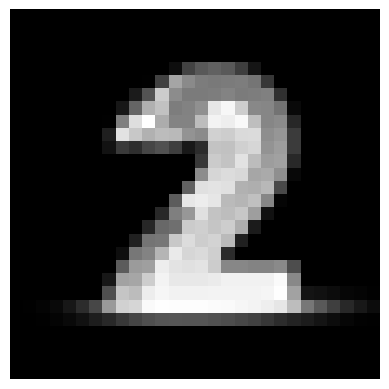

In [56]:
# Get user input and make predictions
path = "picture/"
while True:
    user_input = input("Enter the path to your image (or 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    try:
        user_image = preprocess_user_image(path + user_input)
        if user_image is not None:
            prediction = model.predict(user_image)
            predicted_class = np.argmax(prediction)
            print(f"\nPredicted class: {predicted_class}")
            plt.imshow(user_image.reshape(28, 28), cmap='gray')
            plt.axis('off')
            plt.show()
    except Exception as e:
        print(f"Error: {e}")